# Quadratic function
Updated 25.09.2018

$$f(x) = \frac{1}{2}(x, Q x) + (b, x)$$
$$\nabla f(x) = Qx + b$$

$$x^* = - Q^{-1} b$$


In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

# initialize random generator to get reproduceable results
np.random.seed(42)

# generate matrix Q and vector b
n = 5
m = 2
A = np.random.rand(n, m)
b = 4 * np.random.rand(m)
Q = A.T.dot(A)

# important parameters of the problem
eigs = np.linalg.eigvals(Q)
L = max(eigs)
mu = min(eigs)

print('b = {}'.format(b))
print('Q = \n{}'.format(Q))
print('mu = {}, L = {}'.format(mu, L))

# minimum
x_star = -np.linalg.inv(Q).dot(b)
# some initial point
x_0 = x_star - [8, -1.5]


# function and its gradient (calculated manually)
def quad(Q, b, x):
    return ( 0.5 * Q.dot(x) + b).dot(x)
def quad_grad(Q, b, x):
    return Q.dot(x) + b
# auxilarily function for contour lines
def quad_2d_XY(Q, b, X, Y):
    Z = np.zeros(shape = X.shape)
    for i in range(X.shape[0]):
        for j in range(X.shape[1]):
            Z[i,j] = quad(Q, b, (X[i,j], Y[i,j]))
    return Z


# plot contours
X, Y = np.meshgrid(np.linspace(-5, 15, 400), np.linspace(-10, 3, 100))
Z_quad = quad_2d_XY(Q, b, X, Y)

b = [0.08233798 3.87963941]
Q = 
[[1.06515021 1.29457678]
 [1.29457678 2.53821185]]
mu = 0.31224936468495423, L = 3.2911127007256535


In [2]:
import math

def golden(f, gradf, x, gradient):
    min_step_size = 0.0001
    step_size = 1
    goldenNumber = (math.sqrt(5) - 1) / 2.
    
    ak = 0
    v_ak = f(x + ak * gradient)
    bk = step_size
    v_bk = f(x + bk * gradient)

    uk = ak + goldenNumber * (bk - ak)
    v_uk = f(x + uk * gradient)
    lk = ak + (1 - goldenNumber) * (bk - ak)
    v_lk = f(x + lk * gradient)
    while True:
        if v_uk < v_lk:
            if (bk - lk) < min_step_size:
                return uk
            ak = lk
            v_ak = v_lk
            lk = uk
            v_lk = v_uk
            uk = ak + goldenNumber * (bk - ak)
            v_uk = f(x + uk * gradient)
        else:
            if (uk - ak) < min_step_size:
                return lk
            bk = uk
            v_bk = v_uk
            uk = lk
            v_uk = v_lk
            lk = ak + (1 - goldenNumber) * (bk - ak)
            v_lk = f(x + lk * gradient)

In [3]:
def exact_linesearch(f, gradf, x, gradient):
    return gradient.dot(-b - Q.dot(x)) / gradient.dot(Q.dot(gradient))

def armijo(f, gradf, x, gradient):
    alpha = 1
    rho = 0.1
    step_factor = 0.5
    while(True):
        if f(x + alpha * gradient) <= f(x) + rho * alpha * np.dot(gradf(x), gradient):
            return alpha
        alpha = alpha * step_factor

def GradientDescent(f, gradf, x0, epsilon, num_iter, line_search):
    x = x0.copy()
    iteration = 0
    x_array = [x]
    f_array = [ f(x) ]
    while True:
        gradient = gradf(x)
        alpha = line_search(f, gradf, x, -gradient)
        x = x - alpha * gradient
        x_array += [ x ]
        f_array += [ f(x) ]
        iteration += 1
        
        if np.linalg.norm(gradf(x)) < epsilon:
            break
        if iteration >= num_iter:
            break
    print('{} iterations is taken, f(x^k) = {}'.format(iteration, f_array[-1]))
    return {'x_k' : x_array, 'f_k' : f_array}

Case 2. gradient descent, step-size chosen by golden-ratio search method.

88 iterations is taken, f(x^k) = -7.406399665468864


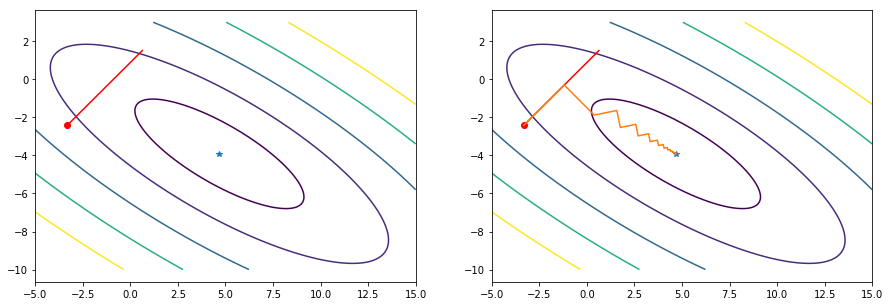

In [4]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2
# some step-size
gamma = 0.6
# on both sub-plots plot:
for k in (0, 1):
    # having equal axes is important to see if lines orthogonal or not
    axes[k].axis('equal')
    # minimum
    axes[k].plot(x_star[0], x_star[1], '*')
    # initial point
    axes[k].plot(x_0[0], x_0[1], 'or')
    # a segment in anti-gradient direction
    axes[k].plot((x_0[0], (x_0 - gamma*quad_grad(Q, b, x_0))[0]), 
                 (x_0[1], (x_0 - gamma*quad_grad(Q, b, x_0))[1]), 'r')
    # plot contour lines
    axes[k].contour(X, Y, Z_quad, levels)

alg_data = GradientDescent(lambda x : quad(Q, b, x), lambda x : quad_grad(Q, b, x), x_0, 1e-7, 10000, golden)


x_data = np.array(alg_data['x_k'])
# plot on second image
axes[1].plot(x_data[:, 0], x_data[:, 1],) 

In [5]:
def computeFibonacci(limit):
        fibonacci = [1., 1.]
        while (fibonacci[-1] < limit):
            fibonacci.append(fibonacci[-2] + fibonacci[-1])

        return fibonacci

def fibonacci(f, gradf, x, gradient):
    min_step_size = 0.0001
    step_size = 1
    limit = step_size / min_step_size
    fibonacci = computeFibonacci(limit)
    
    ak = 0
    v_ak = f(x + ak * gradient)
    bk = step_size
    v_bk = f(x + bk * gradient)

    k = 1

    uk = ak + (fibonacci[-2] / fibonacci[-1]) * (bk - ak)
    v_uk = f(x + uk * gradient)
    lk = ak + fibonacci[-3] / fibonacci[-1] * (bk - ak)
    v_lk = f(x + lk * gradient)
    
    while True:
        if v_uk < v_lk:
            if k > len(fibonacci) - 2:
                return uk
            ak = lk
            v_ak = v_lk
            lk = uk
            v_lk = v_uk
            uk = ak + fibonacci[-k - 1] / fibonacci[-k] * (bk - ak)
            v_uk = f(x + uk * gradient)
        else:
            if k > len(fibonacci) - 2:
                return lk
            bk = uk
            v_bk = v_uk
            uk = lk
            v_uk = v_lk
            lk = ak + fibonacci[-k - 2] / fibonacci[-k] * (bk - ak)
            v_lk = f(x + lk * gradient)
        k = k + 1

gradient descent, step-size chosen by Fibonacci method.

88 iterations is taken, f(x^k) = -7.406399665468862


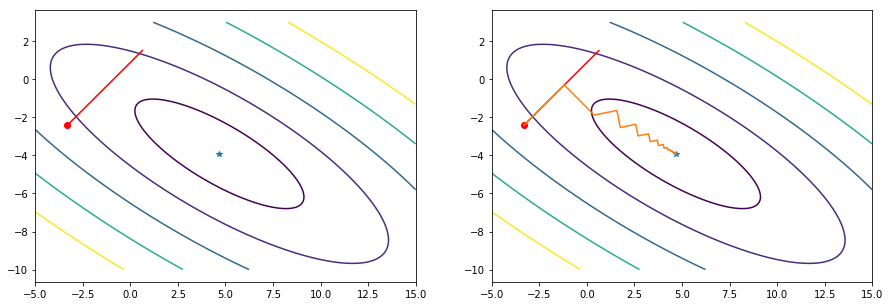

In [6]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2
# some step-size
gamma = 0.6
# on both sub-plots plot:
for k in (0, 1):
    # having equal axes is important to see if lines orthogonal or not
    axes[k].axis('equal')
    # minimum
    axes[k].plot(x_star[0], x_star[1], '*')
    # initial point
    axes[k].plot(x_0[0], x_0[1], 'or')
    # a segment in anti-gradient direction
    axes[k].plot((x_0[0], (x_0 - gamma*quad_grad(Q, b, x_0))[0]), 
                 (x_0[1], (x_0 - gamma*quad_grad(Q, b, x_0))[1]), 'r')
    # plot contour lines
    axes[k].contour(X, Y, Z_quad, levels)

alg_data = GradientDescent(lambda x : quad(Q, b, x), lambda x : quad_grad(Q, b, x), x_0, 1e-7, 10000, fibonacci)


x_data = np.array(alg_data['x_k'])
# plot on second image
axes[1].plot(x_data[:, 0], x_data[:, 1],) 

Case 1. gradient descent, exact line search.

35 iterations is taken, f(x^k) = -7.406399665468871


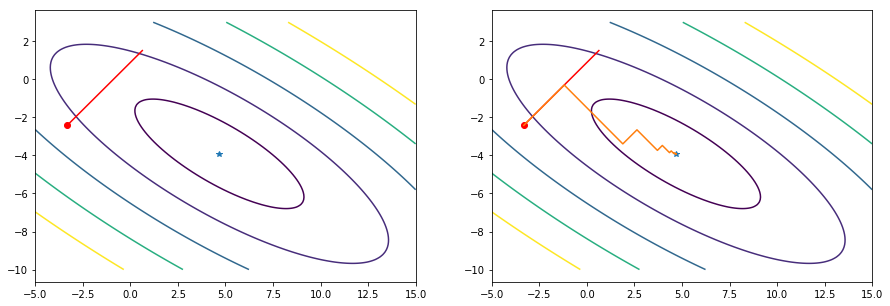

In [7]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2
# some step-size
gamma = 0.6
# on both sub-plots plot:
for k in (0, 1):
    # having equal axes is important to see if lines orthogonal or not
    axes[k].axis('equal')
    # minimum
    axes[k].plot(x_star[0], x_star[1], '*')
    # initial point
    axes[k].plot(x_0[0], x_0[1], 'or')
    # a segment in anti-gradient direction
    axes[k].plot((x_0[0], (x_0 - gamma*quad_grad(Q, b, x_0))[0]), 
                 (x_0[1], (x_0 - gamma*quad_grad(Q, b, x_0))[1]), 'r')
    # plot contour lines
    axes[k].contour(X, Y, Z_quad, levels)

alg_data = GradientDescent(lambda x : quad(Q, b, x), lambda x : quad_grad(Q, b, x), x_0, 1e-7, 10000, exact_linesearch)


x_data = np.array(alg_data['x_k'])
# plot on second image
axes[1].plot(x_data[:, 0], x_data[:, 1],) 

Case 3. gradient descent, step-size chosen by Armijo rule.

86 iterations is taken, f(x^k) = -7.406399665468867


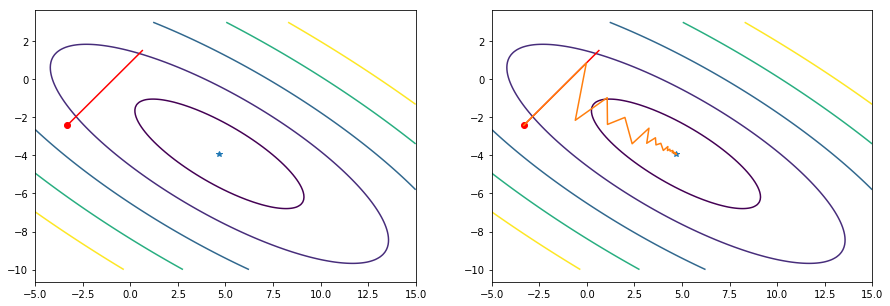

In [8]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2

# on both sub-plots plot:
for k in (0, 1):
    # having equal axes is important to see if lines orthogonal or not
    axes[k].axis('equal')
    # minimum
    axes[k].plot(x_star[0], x_star[1], '*')
    # initial point
    axes[k].plot(x_0[0], x_0[1], 'or')
    # a segment in anti-gradient direction
    axes[k].plot((x_0[0], (x_0 - gamma*quad_grad(Q, b, x_0))[0]), 
                 (x_0[1], (x_0 - gamma*quad_grad(Q, b, x_0))[1]), 'r')
    # plot contour lines
    axes[k].contour(X, Y, Z_quad, levels)

alg_data = GradientDescent(lambda x : quad(Q, b, x), lambda x : quad_grad(Q, b, x), x_0, 1e-7, 10000, armijo)


x_data = np.array(alg_data['x_k'])
# plot on second image
axes[1].plot(x_data[:, 0], x_data[:, 1],) 

In [9]:
def CoordinateDescent(f, gradf, x0, epsilon, num_iter, line_search):
    x = np.array(x0)
    iteration = 0
    endflag = False
    x_array = [x]
    f_prev = f(x)
    f_array = [ f_prev ]
    eye = np.eye(len(x))
    while iteration < num_iter:
        for d in range(len(x)): 
            gradient = gradf(x)
            alpha = line_search(f, gradf, x, -gradient)
            x = x - alpha*gradient[d]*eye[d]
            f_cur = f(x)
            x_array.append(x)
            f_array.append(f_cur)
            

        if abs(f_cur-f_prev) < epsilon:
            break
        if iteration >= num_iter:
            break
        f_prev = f_cur
        iteration += 1
    print('{} iterations is taken, f(x^k) = {}'.format(iteration, f_array[-1]))
    return {'x_k' : x_array, 'f_k' : f_array}

Case 1. coordinate descent, exact line search.

15 iterations is taken, f(x^k) = -7.406399339547583


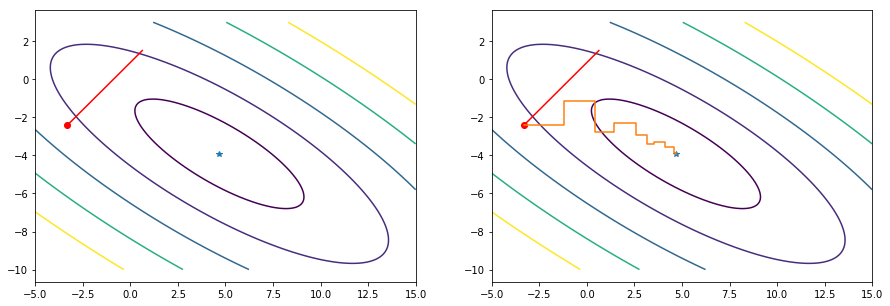

In [10]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2
# some step-size
gamma = 0.6
# on both sub-plots plot:
for k in (0, 1):
    # having equal axes is important to see if lines orthogonal or not
    axes[k].axis('equal')
    # minimum
    axes[k].plot(x_star[0], x_star[1], '*')
    # initial point
    axes[k].plot(x_0[0], x_0[1], 'or')
    # a segment in anti-gradient direction
    axes[k].plot((x_0[0], (x_0 - gamma*quad_grad(Q, b, x_0))[0]), 
                 (x_0[1], (x_0 - gamma*quad_grad(Q, b, x_0))[1]), 'r')
    # plot contour lines
    axes[k].contour(X, Y, Z_quad, levels)

alg_data = CoordinateDescent(lambda x : quad(Q, b, x), lambda x : quad_grad(Q, b, x), x_0, 1e-7, 10000, exact_linesearch)


x_data = np.array(alg_data['x_k'])
# plot on second image
axes[1].plot(x_data[:, 0], x_data[:, 1],) 

Case 2. coordinate descent, step-size chosen by Fibonacci method.

20 iterations is taken, f(x^k) = -7.406399613961739


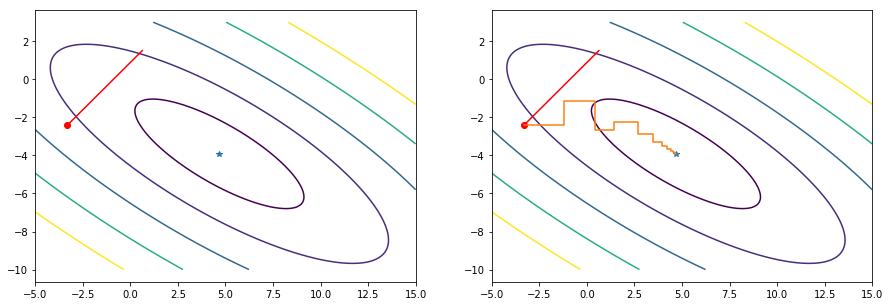

In [11]:
_, axes = plt.subplots(1, 2, figsize=(15, 5))

levels = quad(Q, b, x_star) + np.linspace(0, 10, 6)**2
# some step-size
gamma = 0.6
# on both sub-plots plot:
for k in (0, 1):
    # having equal axes is important to see if lines orthogonal or not
    axes[k].axis('equal')
    # minimum
    axes[k].plot(x_star[0], x_star[1], '*')
    # initial point
    axes[k].plot(x_0[0], x_0[1], 'or')
    # a segment in anti-gradient direction
    axes[k].plot((x_0[0], (x_0 - gamma*quad_grad(Q, b, x_0))[0]), 
                 (x_0[1], (x_0 - gamma*quad_grad(Q, b, x_0))[1]), 'r')
    # plot contour lines
    axes[k].contour(X, Y, Z_quad, levels)

alg_data = CoordinateDescent(lambda x : quad(Q, b, x), lambda x : quad_grad(Q, b, x), x_0, 1e-7, 10000, fibonacci)


x_data = np.array(alg_data['x_k'])
# plot on second image
axes[1].plot(x_data[:, 0], x_data[:, 1],) 